<a href="https://colab.research.google.com/github/JhonnyLimachi/Sigmoidal/blob/main/39_Clustering_com_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 4.0**


---

# Clustering com PyCaret - Public Health

Mais uma vez, trazemos o PyCaret para demonstrar como utilizar AutoML para solução de problemas de Machine Learning com agilidade e precisão.

<p align="center"><img src="https://images.unsplash.com/photo-1580795479025-93d13fd9aa6c?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1025&q=80" width="60%"></p>

Dessa vez, falaremos sobre Clustering.

<p align="center"><img src="https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png" width="60%"></p>

PyCaret é uma biblioteca *open-source* e *low-code* de Python que tem como objetivo reduzir o templo entre o ciclo entre uma hipótese e insights em experimentos com Machine Learning.

O PyCaret possibilita que Cientistas de Dados completem experimentos de ponta a ponta de forma rápida e eficiente. Em comparação com outras bibliotecas do tipo, o PyCaret traz o diferencial de ser *low-code*, isto é, demanda pouco código para que opere de forma robusta. Todas as operações realizadas com o PyCaret estão carregadas em um pipeline que está pronto para o deploy. Basicamente, o PyCaret é um pacote low-code que engloba diversas bibliotecas e frameworks de Machine Learning como scikit-learn, XGBoost, Microsoft LightGBM, spaCy e muito mais.

## Instalando o PyCaret

Por padrão, o PyCaret não faz parte do conjunto de bibliotecas pré-instaladas do Google Colab. Por isso, é importante que sempre que formos trabalhar com ele por aqui, façamos a instalação da lib.

In [13]:
# instalando a biblioteca
!pip install pycaret -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 57.6 M

Além disso, precisamos ativar o modo do Colab. Assim, conseguiremos utilizar as biblioteca aqui no Colab.

In [14]:
# configurando para o Colab
from pycaret.utils import enable_colab
enable_colab()

ImportError: cannot import name 'enable_colab' from 'pycaret.utils' (/usr/local/lib/python3.10/dist-packages/pycaret/utils/__init__.py)

## Coletando os Dados

O PyCaret possui data sets e uma forma própria de carregar esses dados. Para esse projeto, vamos utilizar dados referentes a saúde pública de uma determinada região.

In [15]:
# importando os dados
from pycaret.datasets import get_data
dataset = get_data('public_health')

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


In [16]:
# verificando o formato dos conjunto
dataset.shape

(224, 21)

In [17]:
# separando treino e teste
train = dataset.sample(frac=0.95, random_state=786).reset_index(drop=True)
test = dataset.drop(train.index).reset_index(drop=True)

### Configurando o ambiente no PyCaret
Seguindo as boas práticas para desenvolvimento, vamos importar somente os módulos que vamos precisar, ao invés de importar a biblioteca inteira para utilizar meia dúzia de módulos.

In [18]:
# importando os pacotes necessários
from pycaret.clustering import *

Agora, vamos passar os nossos dados para o PyCaret, para começarmos a explorar os dados e preparar nosso modelo.

Aqui, vamos criar um classificador (clf), e vamos passar os dados, e a variável alvo.

In [19]:
# criando o setup do PyCaret
clus = setup(data=train,
             normalize = True)

,Description,Value
0,Session id,1793
1,Original data shape,"(213, 21)"
2,Transformed data shape,"(213, 233)"
3,Numeric features,20
4,Categorical features,1
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Maximum one-hot encoding,-1


### Comparando os Modelos
Aqui, vamos comparar diferentes modelos, para verificar a performance deles em nosso conjunto de dados, baseado na métrica de avaliação de nossa escolha.

In [20]:
# criando modelo
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0058,5.4468,6.9318,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
# verificando os parâmetros
print(kmeans)

NameError: name 'kmeans' is not defined

In [21]:
# definindo os clusters
model_result = assign_model(kmeans)
model_result.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,Canada,6.313500,6.112419,6.033112,6.228971,6.107698,6.098427,6.364905,6.514306,6.694243,...,6.788408,6.893501,7.063454,7.914158,7.884397,7.676793,7.651145,7.575665,7.411932,Cluster 1
1,Maldives,3.662614,3.603094,3.544089,4.648467,4.749579,5.119448,3.700268,3.567183,3.778201,...,5.237831,4.553267,7.025878,6.729712,5.273435,5.608782,6.502927,8.263833,10.757052,Cluster 1
2,Mauritania,2.230334,1.328808,1.492191,2.084762,2.901813,2.770993,1.879560,2.862060,2.179218,...,1.447616,1.651791,1.354565,1.799803,1.521054,1.279141,1.370247,1.726039,1.871016,Cluster 3
3,Sub-Saharan Africa,2.449863,2.516644,2.494454,2.437191,2.374140,2.271764,2.365897,2.179882,2.392891,...,2.510834,2.462420,2.512477,2.711077,2.489037,2.624570,2.543530,2.459809,2.314823,Cluster 0
4,Sub-Saharan Africa (excluding high income),2.447084,2.513732,2.490668,2.433949,2.370627,2.269188,2.363320,2.177063,2.390205,...,2.509610,2.461744,2.512576,2.711330,2.488515,2.624164,2.542636,2.459071,2.314178,Cluster 0


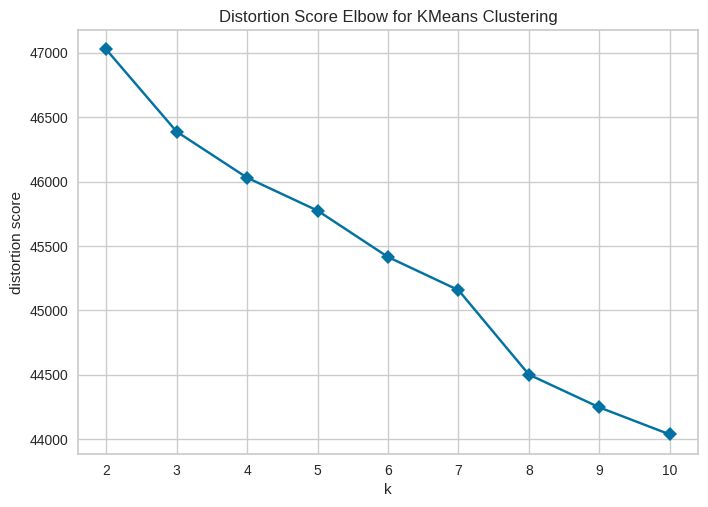

In [22]:
# plotando o modelo
plot_model(kmeans, 'elbow')

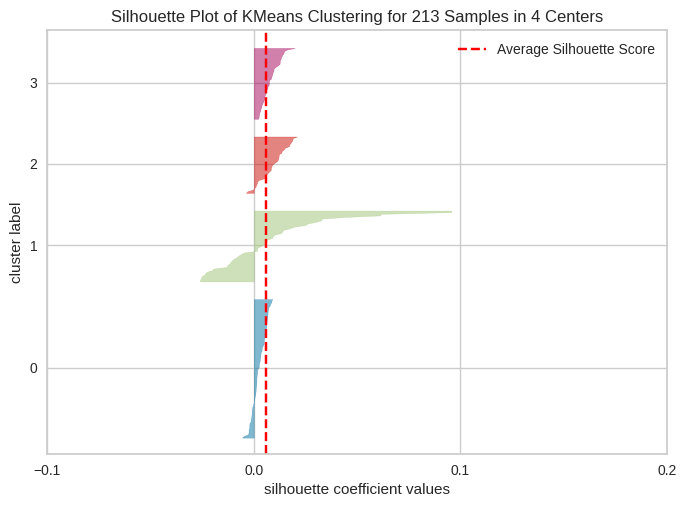

In [23]:
# plotando o modelo
plot_model(kmeans, 'silhouette')

In [24]:
# plotando o modelo
plot_model(kmeans, 'distribution')

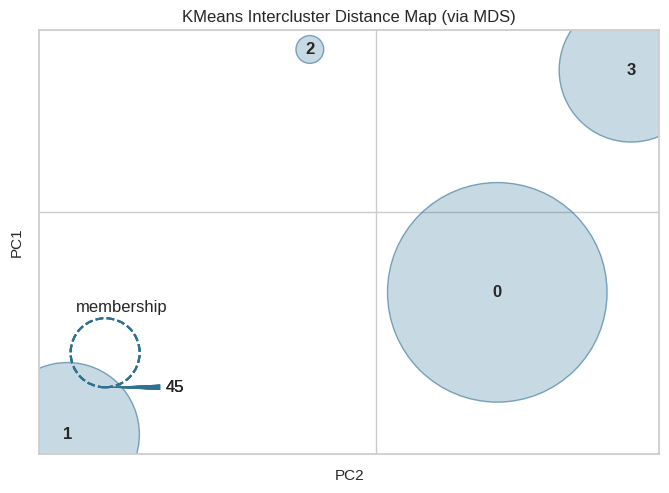

In [25]:
# plotando o modelo
plot_model(kmeans, 'distance')

In [26]:
# plotando o modelo
plot_model(kmeans)

In [27]:
# prevendo em dados de teste
new_pred = predict_model(kmeans, data=test)
new_pred.head()

,Country Name_Canada,Country Name_Maldives,Country Name_Mauritania,Country Name_Sub-Saharan Africa,Country Name_Sub-Saharan Africa (excluding high income),Country Name_Sri Lanka,Country Name_Paraguay,Country Name_Belize,Country Name_Other small states,Country Name_Luxembourg,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,...,0.041870,0.051826,-0.015754,0.043305,0.122299,-0.136437,0.014388,-0.007036,-0.238187,Cluster 2
1,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,...,-0.962558,-0.866345,-0.771541,-0.463587,-0.515516,-0.536846,-0.646937,-0.647286,-0.623482,Cluster 0
2,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,...,1.222919,1.159019,1.332290,1.602601,1.536974,1.483770,1.558274,1.451358,1.343117,Cluster 1
3,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,...,1.245373,1.244794,1.390948,1.542837,1.592474,1.607713,1.658918,1.557644,1.621500,Cluster 1
4,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,-0.06868,...,1.390892,0.308063,0.569005,0.470469,0.504505,0.582665,0.779258,0.765956,0.759282,Cluster 0


In [28]:
# salvando o modelo
save_model(kmeans, 'kmeans_01_09_21')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['1995', '1996', '1997', '1998',
                                              '1999', '2000', '2001', '2002',
                                              '2003', '2004', '2005', '2006',
                                              '2007', '2008', '2009', '2010',
                                              '2011', '2012', '2013', '2014'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Country Name'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Country Name'],
                                     transformer=OneHotEncoder(cols=['Country '
                                                                     'Name'],
        